In [955]:
#Submitted by : Philani Mpofu (1848751)
#Submitted by : Matthew Kruger (1669326)
#Submitted by : Chloe Smith (1877342)
#Submitted by : Goolam Fareed Bangie (1828201)

In [ ]:
import numpy as np
import pandas as pd            
import matplotlib.pyplot as plt
import math

In [956]:
# 4(a) i. Sample 150 x-values from a Normal distribution using a mean of 0 and standard deviation of 10.
#      ii. From the x-values construct a design matrix using the features {1,x,x2}.
xValues = np.random.normal(0, 10, 150)
ones = np.ones(150)
ninety = np.empty(90)
x = np.empty(150)
xSquare = np.empty(150)
xCube = np.empty(150)

for i in range(150):
    x[i] = xValues[i]
    xSquare[i] = xValues[i]**2
    xCube[i] = xValues[i]**3
#xCube.sort()
data = pd.DataFrame(ones)
data.columns = ['1']
data['x'] = x
data['x^2'] = xSquare
#print(data)

In [957]:
# iii. Use a uniform distribution to sample true values for θ0, θ1 and θ2.
thetaValues = np.random.uniform(0, 1, 3)
print("True values for theta = " + str (thetaValues))

# iv. Use your design matrix and the true parameters you obtained to create the y-values for the 
#     regression data. Finally add random noise to the y-values using a Normal distribution with mean
#     0 and standard deviation of 8.

yValues = np.empty(150)
yValuesGD = np.empty(150) # Use for when we do Gradient Descent.
yValues4 = np.empty(150) # Use when an extra theta parameter is added.
yValuesReg = np.empty(150) # Use for when we do Gradient Descent with 4 parameters with Regularization.
noiseValues = np.random.normal(0, 8, 150)
for i in range(150):
    yValues[i] = (thetaValues[0] + thetaValues[1] * data['x'][i] + thetaValues[2] * data['x^2'][i]) + noiseValues[i]
data['y'] = yValues
np.round(data,6)
#data.sort_values(by=['x'], inplace=True, ascending=True)
print(data)

True values for theta = [0.75397704 0.35218594 0.47469017]
       1          x          x^2           y
0    1.0  -0.530356     0.281277   18.991994
1    1.0  -5.809310    33.748079   23.484538
2    1.0   1.816351     3.299130    1.126770
3    1.0  -8.382375    70.264217   29.912727
4    1.0   8.766583    76.852983   29.951098
..   ...        ...          ...         ...
145  1.0   1.218888     1.485689   11.773456
146  1.0  33.051451  1092.398382  533.564854
147  1.0  17.136417   293.656793  150.021559
148  1.0  12.195628   148.733354   79.007874
149  1.0 -19.410461   376.765991  162.756669

[150 rows x 4 columns]


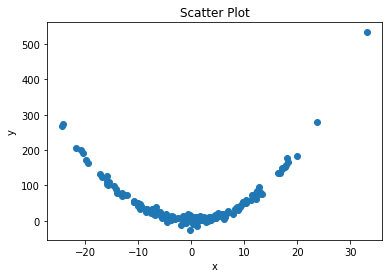

In [958]:
# vii. Plot the x-values and their corresponding y-values on a 2D-axis. Your data should look similar
#      to the data shown in Figure 2a. Hint: pyplot.scatter

plt.scatter(data['x'], data['y'])
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [959]:
# vi. Split the data into training, validation and test datasets.

#Training 
trainDataX = data['x'][0:90]
trainDataY = data['y'][0:90]
trainData = pd.DataFrame({'x':trainDataX,'y':trainDataY}) 
#print(trainData)

#Validation 
validationDataX = data['x'][89:119]
validationDataY = data['y'][89:119]
validationData = pd.DataFrame({'x':validationDataX,'y':validationDataY}) 
#print(validationData) 

#Testing
testDataX = data['x'][119:150]
testDataY = data['y'][119:150]
testData = pd.DataFrame({'x':testDataX,'y':testDataY}) 
#print(testData) 

# (b) i. Use the Moore-Penrose pseudo-inverse to calculate the closed form solution for the model’s parameter values.
#        X is the data.drop(columns = 'y') matrix.
#        Break up the computation into smaller parts.

X = data.drop(columns = 'y')
multi_inverse = np.linalg.inv(np.dot(X.T,X)) # inverse(X.T dot X)
inverse_dot_XT = np.dot(multi_inverse, X.T) # inverse(X.T dot X) dot X.T
learntValues = np.dot(inverse_dot_XT,data['y']) # (inverse(X.T dot X) dot X.T) dot data['y']) 
print("Closed form solution values for theta = " + str(learntValues)) #Moore-Penrose psuedo-inverse

# ii. How close are the learned parameter values to the true parameter values we used to generate the data?

diffValues = [abs(thetaValues[0] - learntValues[0]), abs(thetaValues[1] - learntValues[1]), abs(thetaValues[2] - learntValues[2])]
print("Using the closed form solution, learnt parameter values differ from the true values by the following amount: ")
print(diffValues)

Closed form solution values for theta = [0.53696809 0.36133589 0.47126411]
Using the closed form solution, learnt parameter values differ from the true values by the following amount: 
[0.21700894240264912, 0.00914995431517085, 0.0034260587432572986]


Training Error of closed form solution = 0.022918594175590706
Validation Error of closed form solution = 0.022343089662256663
       1          x          x^2           y
32   1.0 -24.299045   590.443600  266.027014
44   1.0 -24.157820   583.600281  271.483423
47   1.0 -21.662895   469.281009  204.678884
80   1.0 -20.839179   434.271370  197.727344
127  1.0 -20.359215   414.497619  190.293308
..   ...        ...          ...         ...
82   1.0  17.996908   323.888687  175.469827
51   1.0  18.204678   331.410319  164.221033
23   1.0  19.946288   397.854389  182.723556
120  1.0  23.765227   564.786014  277.877893
146  1.0  33.051451  1092.398382  529.907644

[150 rows x 4 columns]


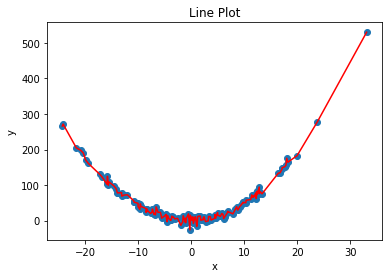

In [960]:
# iii. Compute the training error and validation error for the learned regression model.
dataLearnt = pd.DataFrame(ones)
dataLearnt.columns = ['1']
dataLearnt['x'] = x
dataLearnt['x^2'] = xSquare

yValuesLearnt = np.empty(150)
for i in range(150):
    yValuesLearnt[i] = (learntValues[0] * dataLearnt['1'][i] + learntValues[1] * dataLearnt['x'][i] + learntValues[2] * dataLearnt['x^2'][i]) + noiseValues[i]
dataLearnt['y'] = yValuesLearnt

#Learnt Training 
learntTrainData = pd.DataFrame(ninety)
learntTrainData.columns = ['1']
learntTrainData['x'] = dataLearnt['x'][0:90]
learntTrainData['y'] = dataLearnt['y'][0:90]
dataLearnt.sort_values(by=['x'], inplace=True, ascending=True)
#print(learntTrainData)

#Learnt Validation 
learntValidationDataX = dataLearnt['x'][89:119]
learntValidationDataY = dataLearnt['y'][89:119]
learntValidationData = pd.DataFrame({'x':learntValidationDataX,'y':learntValidationDataY}) 
#print(learntValidationData) 

#Computing the training error of closed form solution:
for i in range(90):
    total = 0
    E = (data['y'][i] - dataLearnt['y'][i])**2
    total = total + E
trainingErrorCF = 0.5 * total
print("Training Error of closed form solution = " + str(trainingErrorCF))

#Computing the validation error of closed form solution:
for i in range(30):
    total = 0
    E = (data['y'][89 + i] - dataLearnt['y'][89 + i])**2
    total = total + E
validationErrorCF = 0.5 * total
print("Validation Error of closed form solution = " + str(validationErrorCF))

# iv.  Create a scatter plot of the individual data points along with the learned regression function,
#      your plot should look like Figure 2b. Hint: pyplot.plot, this plotting function will give weird
#      results if the x-values of the data are not sorted. x train[x train[:,1].argsort()] will give you the
#      design matrix for your training data sorted by the second column (where the x values should be).

print(dataLearnt)
plt.scatter(dataLearnt['x'], dataLearnt['y'])
plt.plot(dataLearnt['x'], dataLearnt['y'], color = 'red')
plt.title('Line Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

True values for theta = [0.75397704 0.35218594 0.47469017]
Values using Gradient Descent = [0.3248695  0.37928912 0.52779145]
 
Training Error for Gradient Descent  = 0.08480904245100342
Validation Error for Gradient Descent  = 0.02568417176252859
Test Error for Gradient Descent  = 30.415045948047496


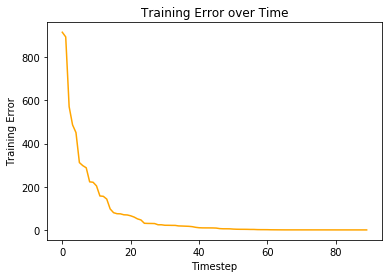

       1          x          x^2           y         yGD
0    1.0  -0.530356     0.281277   18.991994   18.563449
1    1.0  -5.809310    33.748079   23.484538   24.690046
2    1.0   1.816351     3.299130    1.126770    0.922079
3    1.0  -8.382375    70.264217   29.912727   32.987551
4    1.0   8.766583    76.852983   29.951098   33.840585
..   ...        ...          ...         ...         ...
145  1.0   1.218888     1.485689   11.773456   11.456276
146  1.0  33.051451  1092.398382  533.564854  592.039303
147  1.0  17.136417   293.656793  150.021559  165.650456
148  1.0  12.195628   148.733354   79.007874   86.807239
149  1.0 -19.410461   376.765991  162.756669  181.808234

[150 rows x 5 columns]


In [961]:
# v. Repeat the above process using Gradient Descent to train your model. of closed form solution

thetaGD = np.random.uniform(0, 1, 3)

def predictedY(matrix,thetasGuess, index):
    temp = thetasGuess[0]*matrix[0][index] + thetasGuess[1]*matrix[1][index] + thetasGuess[2]*matrix[2][index]
    #print(str(temp) + 'predicted y ')
    return temp

def gradDescent(matrix, yValues):
    thetasGuess = thetas = np.random.uniform(0,1,3)
    learn = 0.0000000000001
    tol = 0.000001
    maxRuns = 0
   # print(matrix[0,5])
    for i in range(129):
        oldGuess = thetasGuess
        temp = (predictedY(matrix, thetasGuess, i) - yValues[i])
    #    print(str(yValues[i]) + " actual y")
        #print(temp)
        temp = temp*learn
        temp = temp* np.array([matrix[0][i],matrix[1][i],matrix[2][i]])
        #print(temp)
        thetasGuess = thetasGuess - temp
    #    print(str(oldGuess) +' '+ 'old')
   #     print(str(thetasGuess) +' '+ 'guess')
        if (np.linalg.norm(thetasGuess - oldGuess) < tol) or (maxRuns == 1000):
            break
        else:
            maxRuns = maxRuns + 1
            if i == 129:
                i = 0
 #   print(thetasGuess)        
    return thetasGuess

matrix = X.to_numpy()                                          # Convert dataFrame to numpy to make the function work 
y = data['y'].to_numpy()                                       # Convert dataFrame to numpy to make it work
thetaGuessGD = gradDescent(matrix, y)                          # Find values for theta using Gradient Descent.
print("True values for theta = " + str(thetaValues))                                             
print("Values using Gradient Descent = " + str(thetaGuessGD)) 

# In addition, plot the training error of your regression model over time (observe or capture the training error every 20
# parameter updates/time steps). Your plot should look like Figure 2c.

trainingErrorArray = np.zeros(90) # Used to track the error of the model over time.
for i in range(150):
    yValuesGD[i] = (thetaGuessGD[0] + thetaGuessGD[1] * data['x'][i] + thetaGuessGD[2] * data['x^2'][i]) + noiseValues[i]
data['yGD'] = yValuesGD

print(" ")

#Computing the training error of Gradient of Descent and plot it on a graph:
for i in range(90):
    total = 0
    E = (data['y'][i] - data['yGD'][i])**2
    trainingErrorArray[i] = E
    total = total + E
trainingErrorGD = 0.5 * total
print("Training Error for Gradient Descent  = " + str(trainingErrorGD))

#Computing the validation error of Gradient Descent:
for i in range(30):
    total = 0
    E = (data['y'][89 + i] - data['yGD'][89 + i])**2
    total = total + E
validationErrorGD = 0.5 * total
print("Validation Error for Gradient Descent  = " + str(validationErrorGD))

#Computing the test error of Gradient Descent:
for i in range(30):
    total = 0
    E = (data['y'][119 + i] - data['yGD'][119 + i])**2
    total = total + E
testErrorGD = 0.5 * total
print("Test Error for Gradient Descent  = " + str(testErrorGD))


trainingErrorArray[::-1].sort()
plt.plot(trainingErrorArray, color = 'orange')
plt.title('Training Error over Time')
plt.xlabel('Timestep')
plt.ylabel('Training Error')
plt.show()


print(data)


In [962]:
# (c) i. Append a third feature to your design matrix for x^3
thetaValues4 = np.random.uniform(0, 1, 4) # Will be used to genrate 4 true values for theta.
print("True values for theta = " + str(thetaValues4))
X['x^3'] = xCube
print(X) 

True values for theta = [0.75206039 0.33073176 0.48262031 0.54563629]
       1          x          x^2           x^3
0    1.0  -0.530356     0.281277     -0.149177
1    1.0  -5.809310    33.748079   -196.053041
2    1.0   1.816351     3.299130      5.992377
3    1.0  -8.382375    70.264217   -588.981039
4    1.0   8.766583    76.852983    673.738075
..   ...        ...          ...           ...
145  1.0   1.218888     1.485689      1.810889
146  1.0  33.051451  1092.398382  36105.351098
147  1.0  17.136417   293.656793   5032.225299
148  1.0  12.195628   148.733354   1813.896728
149  1.0 -19.410461   376.765991  -7313.201532

[150 rows x 4 columns]


In [963]:
# ii. Train a model using Gradient Descent with the new design matrix. Repeat the process used above
#     in Question 4b. Note, we are now using a third-order polynomial to fit data which was generated
#     using a second-order polynomial. Our function is, thus, more complicated than is necessary to
#     fit the data and as a result will overfit

def predictedY4(matrix,thetasGuess, index):
    temp = thetasGuess[0]*matrix[0][index] + thetasGuess[1]*matrix[1][index] + thetasGuess[2]*matrix[2][index] + thetasGuess[3]*matrix[3][index]
    #print(str(temp) + 'predicted y ')
    return temp

def gradDescent4(matrix, yValues):
    thetasGuess = thetas = np.random.uniform(0,1,4)
    learn = 0.0000000000001
    tol = 0.000001
    maxRuns = 0
   # print(matrix[0,5])
    for i in range(129):
        oldGuess = thetasGuess
        temp = (predictedY(matrix, thetasGuess, i) - yValues[i])
    #    print(str(yValues[i]) + " actual y")
        #print(temp)
        temp = temp*learn
        temp = temp* np.array([matrix[0][i],matrix[1][i],matrix[2][i],matrix[3][i]])
        #print(temp)
        thetasGuess = thetasGuess - temp
    #    print(str(oldGuess) +' '+ 'old')
   #     print(str(thetasGuess) +' '+ 'guess')
        if (np.linalg.norm(thetasGuess - oldGuess) < tol) or (maxRuns == 1000):
            break
        else:
            maxRuns = maxRuns + 1
            if i == 129:
                i = 0
 #   print(thetasGuess)        
    return thetasGuess                                       
matrix4 = X.to_numpy()                                        #  # Convert dataFrame to numpy to make it work
thetaGuess4 = gradDescent4(matrix4, y)                        # Find parameters for theta using Gradient Descent.
print("True values for theta = " + str(thetaValues4))                                             
print("Values for theta using GD = " + str(thetaGuess4))

for i in range(150):
    yValues4[i] = (thetaGuess4[0] + thetaGuess4[1] * X['x'][i] + thetaGuess4[2] * X['x^2'][i] + thetaGuess4[3] * X['x^3'][i]) + noiseValues[i]


print(" ")

#Computing the training error of Gradient of Descent of third order polynomial:
for i in range(90):
    total = 0
    E = (data['y'][i] - yValues4[i])**2
    total = total + E
trainingError4 = 0.5 * total
print("Training Error for Gradient Descent 3rd order  = " + str(trainingError4))

#Computing the validation error of Gradient Descent of third order polynomial:
for i in range(30):
    total = 0
    E = (data['y'][89 + i] - yValues4[89 + i])**2
    total = total + E
validationError4 = 0.5 * total
print("Validation Error for Gradient Descent 3rd order = " + str(validationError4))

#Computing the test error of Gradient Descent:
for i in range(30):
    total = 0
    E = (data['y'][119 + i] - yValues4[119 + i])**2
    total = total + E
testErrorGD4 = 0.5 * total
print("Test Error for Gradient Descent 3rd Order  = " + str(testErrorGD4))


True values for theta = [0.75206039 0.33073176 0.48262031 0.54563629]
Values for theta using GD = [0.72234895 0.65362995 0.79008449 0.99912847]
 
Training Error for Gradient Descent 3rd order  = 0.01499231797809777
Validation Error for Gradient Descent 3rd order = 20.75548817014087
Test Error for Gradient Descent 3rd Order  = 1735142.6842630673


In [964]:
# iii. Repeat the training process one final time, this time use regularization when training the third order polynomial model.

def predictedYReg(matrix,thetasGuess, index):
    temp = thetasGuess[0]*matrix[0][index] + thetasGuess[1]*matrix[1][index] + thetasGuess[2]*matrix[2][index] + thetasGuess[3]*matrix[3][index]
    #print(str(temp) + 'predicted y ')
    return temp

def gradDescentReg(matrix, yValues):
    thetasGuess = thetas = np.random.uniform(0,1,4)
    learn = 0.0000000000001
    tol = 0.000001
    maxRuns = 0
   # print(matrix[0,5])
    for i in range(129):
        oldGuess = thetasGuess
        temp = (predictedY(matrix, thetasGuess, i) - yValues[i])
    #    print(str(yValues[i]) + " actual y")
        #print(temp)
        temp = temp*learn
        if i == 0:
            temp = temp* np.array([matrix[0][i],matrix[1][i],matrix[2][i],matrix[3][i]])
        else:
            temp = temp* (np.array([matrix[0][i],matrix[1][i],matrix[2][i],matrix[3][i]]) + 0.2 * np.array([matrix[0][i],matrix[1][i],matrix[2][i],matrix[3][i]]))

        #print(temp)
        thetasGuess = thetasGuess - temp
    #    print(str(oldGuess) +' '+ 'old')
   #     print(str(thetasGuess) +' '+ 'guess')
        if (np.linalg.norm(thetasGuess - oldGuess) < tol) or (maxRuns == 1000):
            break
        else:
            maxRuns = maxRuns + 1
            if i == 129:
                i = 0
 #   print(thetasGuess)        
    return thetasGuess

thetaGuess4Reg = gradDescent4(matrix4, y)                          # Find parameters for theta using Gradient Descent.
print("True values for theta = " + str(thetaValues4))                                             
print("Values for theta using GDReg = " + str(thetaGuess4))
for i in range(150):
    yValuesReg[i] = (thetaGuess4Reg[0] + thetaGuess4Reg[1] * X['x'][i] + thetaGuess4Reg[2] * X['x^2'][i] + thetaGuess4Reg[3] * X['x^3'][i]) + noiseValues[i]

print(" ")

#Computing the training error of Gradient of Descent of third order polynomial:
for i in range(90):
    total = 0
    E = (data['y'][i] - yValuesReg[i])**2
    total = total + E
trainingErrorReg = 0.5 * total
print("Training Error for Gradient Descent with regulariztion  = " + str(trainingErrorReg))

#Computing the validation error of Gradient Descent of third order polynomial:
for i in range(30):
    total = 0
    E = (data['y'][89 + i] - yValuesReg[89 + i])**2
    total = total + E
validationErrorReg = 0.5 * total
print("Validation Error for Gradient Descent with regularization = " + str(validationErrorReg))

#Computing the test error of Gradient Descent:
for i in range(30):
    total = 0
    E = (data['y'][119 + i] - yValuesReg[119 + i])**2
    total = total + E
testErrorReg = 0.5 * total
print("Test Error for Gradient Descent with regularization  = " + str(testErrorReg))



True values for theta = [0.75206039 0.33073176 0.48262031 0.54563629]
Values for theta using GDReg = [0.72234895 0.65362995 0.79008449 0.99912847]
 
Training Error for Gradient Descent with regulariztion  = 0.0002372368726802055
Validation Error for Gradient Descent with regularization = 0.020780109073927883
Test Error for Gradient Descent with regularization  = 463.157968675616


iv. Compare your results of the three gradient descent based models, which model achives the best final training error? Which model achieves the best validation error? Can you see any visible difference in the function approximation (fit of the data) by the models or in the learned parameter values? Did any of these models achieve a lower training or validation error than the closed form solution?

Gradient Descent with Regularization of a third order polynomial achieves the best final training error. 
Gradient Descent with Regularization of a third order polynomial achieves the best final validation error. 

The learned paramaters in all three models differ from the true values, but they are a good close approximation to the true values, given that the true values have a lot of generated noise. 

Gradient Descent with Regularization of a third order polynomial achieved a lower training and validation error than the closed form solution.

v. Compute the final test error for all four of your models. Which model obtains the lowest test
error? Did the regularisation improve the test error performance of the third-order polynomial
model? Which of the three gradient descent models achieved the lowest test error? Would you
say it is better to use higher-order polynomials and regularize or use a model which only uses the
necessary features to fit the data.

In this case it is the closed form solution that achieves the best test error.

Regularisation did improve the test error performance of the third-order polynomial model, significantly in this case.

Gradient Descent with Regularization of a third order polynomial achieves the best final test error. 

From these cases alone, I would say that it is better to use higher-order polynomials and regularize.
